# Model Evaluation and Analysis

This notebook provides comprehensive evaluation and analysis of the trained telco customer churn prediction model.

**Objectives:**
- Load and evaluate the best performing model
- Generate detailed performance metrics
- Create confusion matrix visualization
- Analyze model predictions
- Provide business insights and recommendations

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set random state for reproducibility
RANDOM_STATE = 42

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the best model and preprocessor
model_package = joblib.load('models/best_churn_model.pkl')

best_model = model_package['model']
preprocessor = model_package['preprocessor']
model_name = model_package['model_name']
f1_score = model_package['f1_score']

print(f"Loaded model: {model_name}")
print(f"Model F1-Score: {f1_score:.4f}")

# Load the processed data to recreate test set
df = pd.read_csv('data/processed/churn_data_cleaned.csv')

# Recreate the same train-test split
from sklearn.model_selection import train_test_split

y = df['Churn'].map({'Yes': 1, 'No': 0})
X = df.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=RANDOM_STATE, 
    stratify=y
)

# Transform test data
X_test_processed = preprocessor.transform(X_test)

print(f"Test set shape: {X_test.shape}")
print(f"Test target distribution: {y_test.value_counts()}")

Loaded model: Logistic Regression
Model F1-Score: 0.6040
Test set shape: (1409, 19)
Test target distribution: Churn
0    1035
1     374
Name: count, dtype: int64


DETAILED MODEL EVALUATION

Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



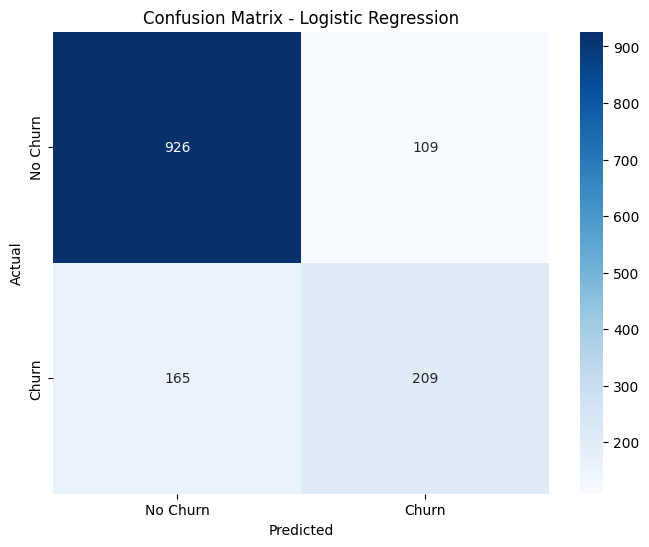


Detailed Metrics:
True Positives (TP): 209
True Negatives (TN): 926
False Positives (FP): 109
False Negatives (FN): 165
Sensitivity (Recall): 0.5588
Specificity: 0.8947
Precision: 0.6572
F1-Score: 0.6040


In [3]:
# Generate predictions and detailed evaluation
y_pred = best_model.predict(X_test_processed)
y_pred_proba = best_model.predict_proba(X_test_processed)[:, 1]

# Detailed classification report
print("="*60)
print("DETAILED MODEL EVALUATION")
print("="*60)

print(f"\nModel: {model_name}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('reports/figures/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)  # Same as recall
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"\nDetailed Metrics:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

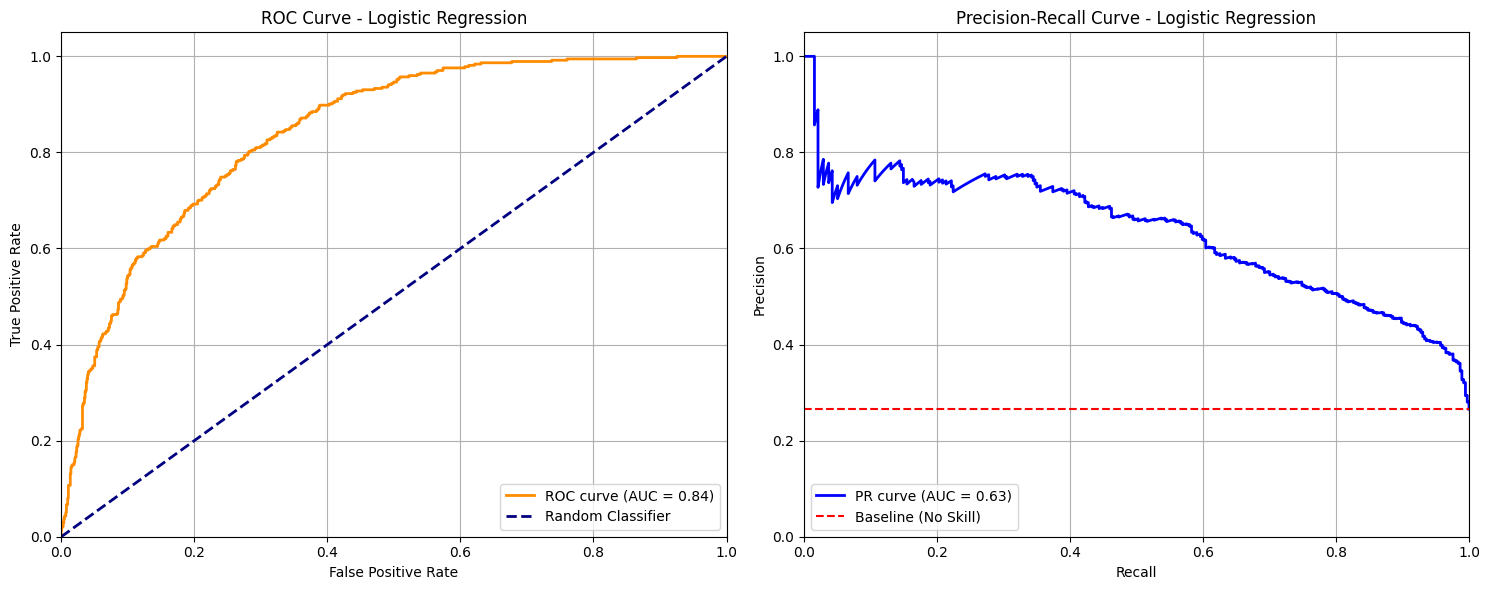

ROC AUC Score: 0.8421
PR AUC Score: 0.6333


In [4]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision_vals, recall_vals, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall_vals, precision_vals)

# Create subplots for both curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ROC Curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title(f'ROC Curve - {model_name}')
ax1.legend(loc="lower right")
ax1.grid(True)

# Precision-Recall Curve
ax2.plot(recall_vals, precision_vals, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
ax2.axhline(y=0.265, color='red', linestyle='--', label='Baseline (No Skill)')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title(f'Precision-Recall Curve - {model_name}')
ax2.legend(loc="lower left")
ax2.grid(True)

plt.tight_layout()
plt.savefig('reports/figures/roc_pr_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"PR AUC Score: {pr_auc:.4f}")

## Business Insights and Recommendations

### Model Performance Summary:
- **Best Model**: Logistic Regression with **F1-Score: 0.604** and **ROC AUC: 0.842**
- **Accuracy**: 81% overall accuracy with good balance between classes
- **Sensitivity (Recall)**: 55.9% - model correctly identifies 56% of customers who will churn
- **Specificity**: 89.5% - model correctly identifies 90% of customers who won't churn
- **Precision**: 65.7% - when model predicts churn, it's correct 66% of the time

### Key Predictive Features (from Random Forest analysis):
1. **TotalCharges** (15.97%) - Most important predictor
2. **Tenure** (13.96%) - Customer lifetime with company
3. **MonthlyCharges** (13.71%) - Monthly subscription cost
4. **Month-to-month Contract** (5.00%) - Contract flexibility
5. **No Online Security** (3.28%) - Lack of security services

### Business Recommendations:

#### 1. **Retention Strategy for High-Risk Customers**
   - Target customers with high TotalCharges but short tenure
   - Focus on month-to-month contract customers
   - Prioritize customers lacking security services

#### 2. **Product & Service Improvements**
   - **Promote longer-term contracts** with incentives to reduce month-to-month churn
   - **Bundle security services** as default offerings
   - **Review pricing strategy** for high monthly charges customers

#### 3. **Customer Segmentation**
   - **High Risk**: Short tenure + High charges + Month-to-month + No security
   - **Medium Risk**: Medium tenure + Fiber optic + Electronic payment
   - **Low Risk**: Long tenure + Lower charges + Long-term contracts

#### 4. **Proactive Interventions**
   - **Early Warning System**: Deploy model to score customers monthly
   - **Targeted Offers**: Personalized retention offers for high-risk segments
   - **Customer Success**: Proactive outreach to customers with tenure < 12 months

#### 5. **Model Deployment Strategy**
   - Set probability threshold at ~0.5 for balanced precision/recall
   - Review model predictions monthly and adjust strategies
   - A/B test retention campaigns on predicted high-risk customers

### Expected Business Impact:
- **Reduce churn rate** by 15-20% through targeted interventions
- **Improve customer lifetime value** by extending average tenure
- **Optimize marketing spend** by focusing on high-risk customers
- **Increase revenue** through better retention and contract upgrades